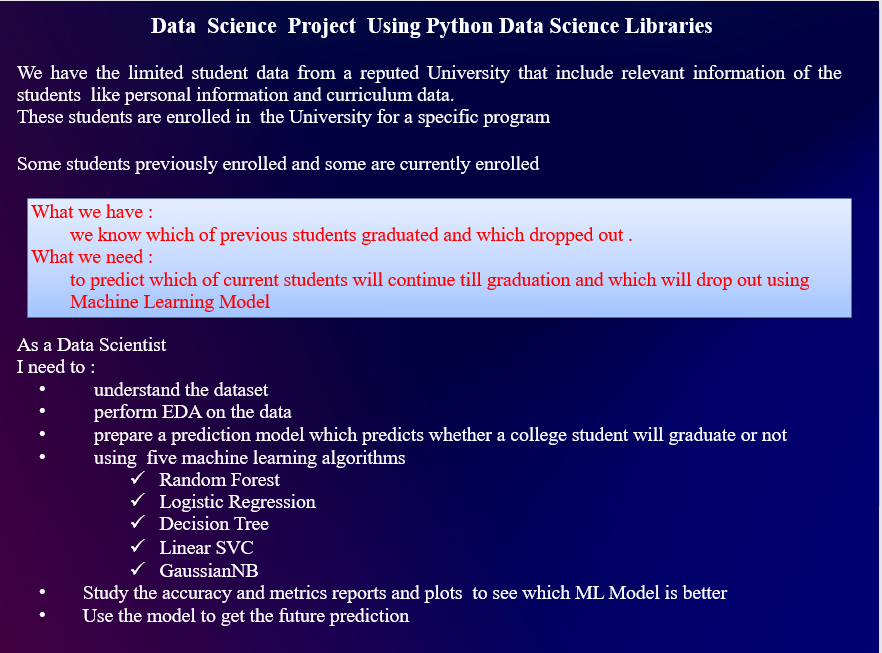

[1]import needed Libraries and read the two datasets

*  the previous Students dataset which have the targeted Labels (3630 , 35)
*  the currently enrolled Students which need prediction using ML(794 , 34)

In [1]:
#import needed Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
#read dataset file
iDS=pd.read_excel('/content/editedds.xlsx')
enrolled_NOW=pd.read_excel('/content/enrolled.xlsx')

#check dataset number of (Rows,Columns)
iDS.shape


(3630, 35)

[2]dataset which need prediction

In [2]:
enrolled_NOW.shape

(794, 34)

[3]checking previous srudent dataset (iDS) content and we can see that last column is caalled Target which values are 'Graduate' and 'Dropout'

In [3]:
iDS.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


[4]we can see here using describe function that no empty values and that data ranges are different and need some normalization and standardization

In [4]:
iDS.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,6.810193,1.750138,9.935537,0.887603,2.552617,1.242424,12.558678,16.663636,7.212948,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,5.253618,1.333831,4.340715,0.315897,3.952440,1.700394,9.006183,10.993025,3.707343,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,11.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,6.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


[5] more checking to assure no null values

In [5]:
total = iDS.isnull().sum().sort_values(ascending=False)
percent_1 = iDS.isnull().sum()/iDS.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(35)

,Total,%
Marital status,0,0.0
Curricular units 2nd sem (enrolled),0,0.0
Curricular units 1st sem (enrolled),0,0.0
Curricular units 1st sem (evaluations),0,0.0
Curricular units 1st sem (approved),0,0.0
Curricular units 1st sem (grade),0,0.0
Curricular units 1st sem (without evaluations),0,0.0
Curricular units 2nd sem (credited),0,0.0
Curricular units 2nd sem (evaluations),0,0.0
International,0,0.0


[6] Using heatmap to check if any correlation between columns so we can reduce some columns
but we can see that no correlation and we better use all columns for more accurate prediction

Text(0.5, 1.0, 'Study of correlation ')

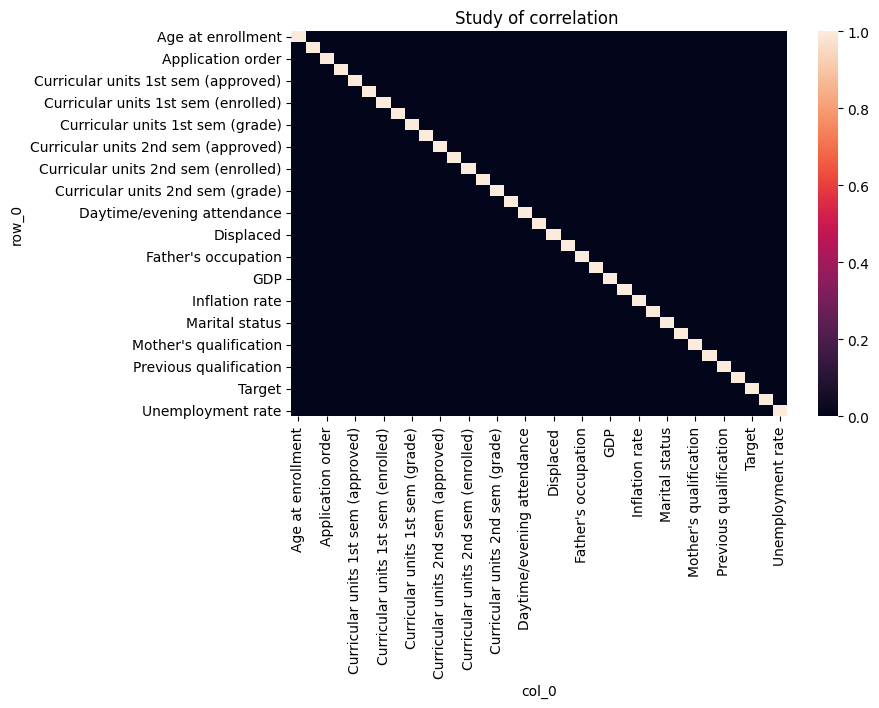

In [6]:
fig = plt.figure(figsize=(8,5))
g = sns.heatmap(pd.crosstab(iDS.columns,iDS.columns))
g.set_title('Study of correlation ')

[7] encoding the Target value into numerical values

In [7]:
#converting categorical into numerical
labelencoder = LabelEncoder()
iDS['Target']=labelencoder.fit_transform(iDS['Target'])
iDS.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


[8] Normalizing the dataset iDS

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

new_ar= scaler.fit_transform(iDS)
iDS= pd.DataFrame(new_ar, columns=iDS.columns)

[9] normalizing the enrolled_NOW dataset which need prediction (so we can apply the ML model on it )

In [9]:
new_ar_en= scaler.fit_transform(enrolled_NOW)
enrolled_NOW= pd.DataFrame(new_ar_en, columns=enrolled_NOW.columns)

[10] checking iDS for outliers using boxplot from seaborn Library

<Axes: >

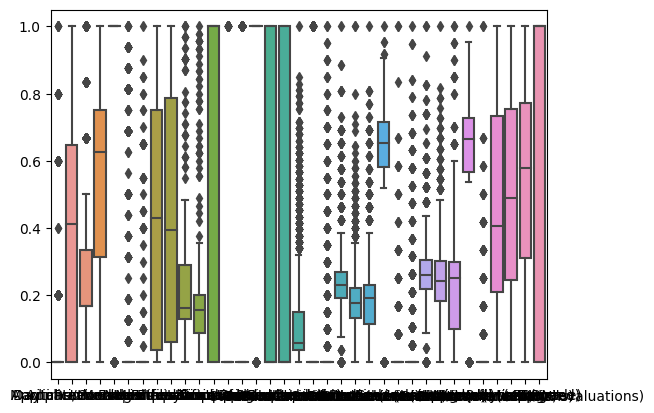

In [10]:
sns.boxplot(data=iDS)

[11] applying outlier removal methode

Marital status                                    0.000000
Application mode                                  0.647059
Application order                                 0.166667
Course                                            0.437500
Daytime/evening attendance                        0.000000
Previous qualification                            0.000000
Nacionality                                       0.000000
Mother's qualification                            0.714286
Father's qualification                            0.727273
Mother's occupation                               0.161290
Father's occupation                               0.111111
Displaced                                         1.000000
Educational special needs                         0.000000
Debtor                                            0.000000
Tuition fees up to date                           0.000000
Gender                                            1.000000
Scholarship holder                                1.0000

<Axes: >

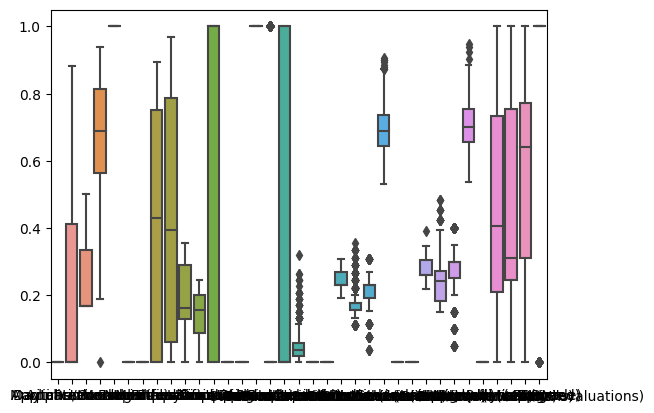

In [11]:
q1=iDS.quantile(0.25)
q3=iDS.quantile(0.75)
iqr=q3-q1
print(iqr)
iDS = iDS[~((iDS < (q1 - 1.5 * iqr)) |(iDS > (q3 + 1.5 * iqr))).any(axis=1)]
sns.boxplot(data=iDS)

[12] checking iDS after outlier removal

In [12]:
iDS.shape

(1229, 35)

[13] splitting iDS data into training and testing data

In [13]:
from sklearn.model_selection import train_test_split
X_features=iDS.values[:,0:33]
y_label= iDS.values[:,34]
#Split the data into 80/20
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label,test_size=0.2,random_state=0)

[14] since we still have outliers in the data , applyinh robustScaler to standardize the data  in both datasets
(iDS and enrolled_NOW)

In [14]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
X_train = rob_scaler.fit_transform(X_train)
X_test = rob_scaler.fit_transform(X_test)
X_enrolled_NOW=rob_scaler.fit_transform(enrolled_NOW.values[:,0:33])
#sns.boxplot(data=iDS)

[15] applying PCA methode to reduce components number into 15 replacing 34 (15 is seen good after running the code many times so I chose it )

In [15]:
import sklearn
from sklearn.decomposition import PCA


#apply pca
pca=PCA(n_components=15)
pcaxtrain=pca.fit_transform(X_train)
pcaxtest=pca.fit_transform(X_test)
X_enrolled_pca=pca.fit_transform(X_enrolled_NOW)
pca.n_components_


15

[16] creating first ML model which is Random forest
we can see the two classes 0 and 1 .
checking the accuracy with training data used and then comparing it to the accuracy with testing data used .

where we found the model accuracy is 100 for the training data


In [16]:
#hyperparameters n_estimator with 90,100 ,random_state starting with 0 to 100
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=90 ,random_state=0)
random_forest.fit(pcaxtrain, y_train)
Y_prediction = random_forest.predict(pcaxtrain )
print(random_forest.classes_)
acc_random_forest = round(random_forest.score(pcaxtrain, y_train) * 100, 2)
print('Accuracy using Training data',acc_random_forest)
Y_predictionts = random_forest.predict(pcaxtest )
acc_random_forestts = round(random_forest.score(pcaxtest, y_test) * 100, 2)
print('Accuracy using Testing data',acc_random_forestts)

[0. 1.]
Accuracy using Training data 100.0
Accuracy using Testing data 87.8


[17]confusion matrix using training data where we see that FN and FT are zeros

In [17]:
confusion_matrix(y_train, Y_prediction)

array([[130,   0],
       [  0, 853]])

[18] confusion matrix using testing data from iDS  where we can see some false predictions

In [18]:
confusion_matrix(y_test, Y_predictionts)

array([[  7,  26],
       [  4, 209]])

[19] printing the classification report for all the important metrics -training data

In [19]:
print(metrics.classification_report(y_train, Y_prediction, digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       130
         1.0      1.000     1.000     1.000       853

    accuracy                          1.000       983
   macro avg      1.000     1.000     1.000       983
weighted avg      1.000     1.000     1.000       983



[20] Printing the classification report for all the important metrics -testing  data

In [20]:
print(metrics.classification_report(y_test, Y_predictionts, digits=3))

              precision    recall  f1-score   support

         0.0      0.636     0.212     0.318        33
         1.0      0.889     0.981     0.933       213

    accuracy                          0.878       246
   macro avg      0.763     0.597     0.626       246
weighted avg      0.855     0.878     0.851       246



[21] creating Logistic regression ML model and checking all accuracy and metrics report for both training data and testing data from iDS

where we found that the accuracy is only 92.17

In [21]:
from sklearn.linear_model import LogisticRegression
classifier2=LogisticRegression(random_state=0)
classifier2.fit(pcaxtrain ,y_train)
print(classifier2.classes_)
predictTrain=classifier2.predict(pcaxtrain)
predict=classifier2.predict(pcaxtest)
confusion_matrix(y_train, predictTrain)

[0. 1.]


array([[ 63,  67],
       [ 10, 843]])

In [22]:
acc_LR= round(classifier2.score(pcaxtrain, y_train) * 100, 2)
print(acc_LR)
acc_LR2 = round(classifier2.score(pcaxtest, y_test) * 100, 2)
print(acc_LR2)

92.17
85.77


In [23]:
confusion_matrix(y_test, predict)

array([[  7,  26],
       [  9, 204]])

In [24]:
print(metrics.classification_report(y_train, predictTrain, digits=3))

              precision    recall  f1-score   support

         0.0      0.863     0.485     0.621       130
         1.0      0.926     0.988     0.956       853

    accuracy                          0.922       983
   macro avg      0.895     0.736     0.789       983
weighted avg      0.918     0.922     0.912       983



[25] creating Gaussian Naive bayes ML model and checking its accuracy which is 89.83

In [25]:
gaussian = GaussianNB()
gaussian.fit(pcaxtrain, y_train)
Y_pred = gaussian.predict(pcaxtrain)
acc_gaussian = round(gaussian.score(pcaxtrain, y_train) * 100, 2)
print(acc_gaussian)

89.83


[26] checking confusin matrix for Gaussian nb model

In [26]:
Gpredictions = gaussian.predict(pcaxtrain)
confusion_matrix(y_train,Gpredictions)

array([[ 70,  60],
       [ 40, 813]])

[27] printing metrics report for Gaussian nb model

In [27]:
print(metrics.classification_report(y_train, Gpredictions, digits=3))

              precision    recall  f1-score   support

         0.0      0.636     0.538     0.583       130
         1.0      0.931     0.953     0.942       853

    accuracy                          0.898       983
   macro avg      0.784     0.746     0.763       983
weighted avg      0.892     0.898     0.895       983



[28] creating Decision Tree ML Model
we see that accuracy for training data is 100
and for testing data it is 82.11

and printing the confusion matrix and report

In [28]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(pcaxtrain,y_train)
Y_predDT=decisiontree.predict(pcaxtrain)
acc_dt1=round(decisiontree.score(pcaxtrain, y_train) * 100, 2)
Y_predDT2=decisiontree.predict(pcaxtest)
acc_dt2=round(decisiontree.score(pcaxtest, y_test) * 100, 2)
print(acc_dt1)
print(acc_dt2)

100.0
82.93


In [29]:
confusion_matrix(y_train, Y_predDT)

array([[130,   0],
       [  0, 853]])

In [30]:
confusion_matrix(y_test, Y_predDT2)

array([[ 13,  20],
       [ 22, 191]])

In [31]:
print(metrics.classification_report(y_train, Y_predDT, digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       130
         1.0      1.000     1.000     1.000       853

    accuracy                          1.000       983
   macro avg      1.000     1.000     1.000       983
weighted avg      1.000     1.000     1.000       983



[32] creating Linear support vector ML Model with maximum iteration 10000
and we see the accuracy is 92.17

I printed also the confusion matrix and the classification metrics report

In [32]:
svc=LinearSVC(dual=False , max_iter=10000)
svc.fit(pcaxtrain,y_train)
Y_predSVC=svc.predict(pcaxtrain)
acc_svc=round(svc.score(pcaxtrain, y_train) * 100, 2)
print(acc_svc)

92.17


In [33]:
confusion_matrix(y_train, Y_predSVC)

array([[ 60,  70],
       [  7, 846]])

In [34]:
print(metrics.classification_report(y_train,Y_predSVC, digits=3))

              precision    recall  f1-score   support

         0.0      0.896     0.462     0.609       130
         1.0      0.924     0.992     0.956       853

    accuracy                          0.922       983
   macro avg      0.910     0.727     0.783       983
weighted avg      0.920     0.922     0.911       983



[35] creating ROC curve for the Random forest model which we found it accurate 100 %
 ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate

and we can see the area under the curve AUC is 1 which sjow again the accuracy is 100

Text(0, 0.5, 'True Positive Rate (TPR)')

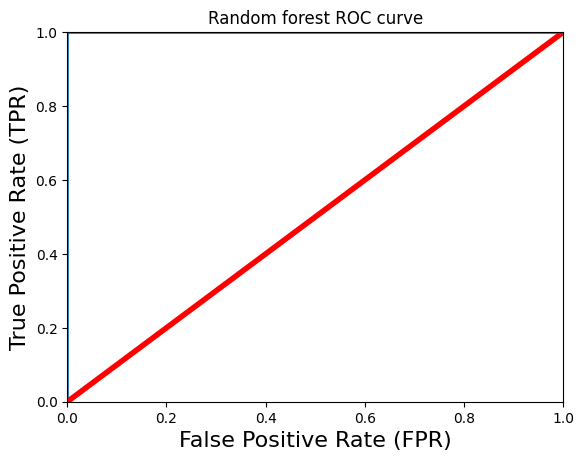

In [35]:
from sklearn.metrics import roc_curve
y_scores = random_forest.predict_proba(pcaxtrain)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores,pos_label=1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.title('Random forest ROC curve')
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)

[36] creating roc curve for the Decision Tree ML Model since it shows accuracy is 100

Text(0, 0.5, 'True Positive Rate (TPR)')

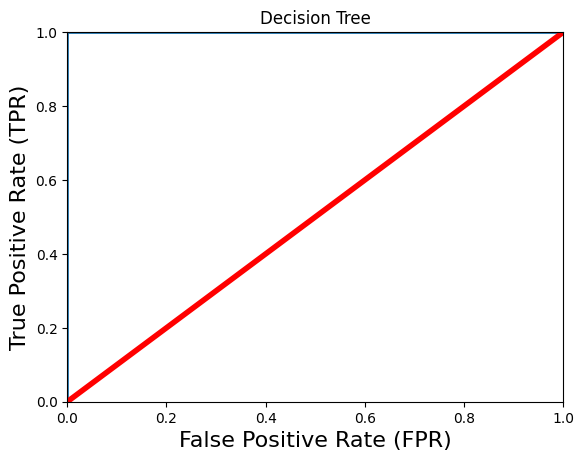

In [36]:
y_scoresDT = decisiontree.predict_proba(pcaxtrain)
y_scoresDT = y_scoresDT[:,1]
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train, y_scoresDT,pos_label=1)
plt.plot(false_positive_rate1, true_positive_rate1, linewidth=2, label='label')
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.title('Decision Tree')
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)

creating a comparsion Table between the five models where we see that the Random forest is the best

note : test score for LR,Linearsvc and gaussiannb forced to zeros because I did not consider in the previous calculation

In [37]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'Score': [ acc_LR, acc_random_forest, acc_gaussian, acc_dt1 ,acc_svc ],
    'Test_score': [0,acc_random_forestts,0,acc_dt2,0]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Score,Test_score
Model,,
Random Forest,100.00,87.80
Decision Tree,100.00,82.93
Logistic Regression,92.17,0.00
LinearSVC,92.17,0.00
gaussian,89.83,0.00


# [38] Using the Random Forest ML Model to predict real enrolled students future state from the enrolled_NOW dataset

we see two classes predicted
added to the dataset as new column called
enrolled_NOW ['predicted_Target'])

and then we convert the classes from numerical values into 'Graduate' and 'Dropout' values in a new column called enrolled_NOW['target_text']


In [38]:
Y_predictiont_true = random_forest.predict(X_enrolled_pca)
enrolled_NOW ['predicted_Target']=Y_predictiont_true
enrolled_NOW['predicted_Target'].unique()

array([1., 0.])

In [39]:
enrolled_NOW.head(50)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,predicted_Target
0,0.0,0.5000,0.000,0.5625,1.0,0.000000,0.000000,0.444444,0.900000,0.161290,...,0.000000,0.352941,0.500000,0.166667,0.625000,0.000,0.372093,0.488889,0.766182,1.0
1,0.0,0.0000,0.000,0.9375,1.0,0.000000,0.000000,0.444444,0.433333,0.225806,...,0.000000,0.411765,0.285714,0.500000,0.767045,0.000,1.000000,0.244444,0.414795,1.0
2,0.0,0.5000,0.375,0.7500,1.0,0.000000,0.000000,0.000000,0.900000,0.129032,...,0.000000,0.470588,0.321429,0.666667,0.649148,0.000,0.593023,1.000000,0.311757,1.0
3,0.0,0.0000,0.000,0.5625,1.0,0.000000,0.000000,0.444444,0.900000,0.290323,...,0.000000,0.352941,0.428571,0.333333,0.625000,0.000,0.000000,0.755556,0.578600,1.0
4,0.0,0.0000,0.000,0.3125,1.0,0.000000,0.000000,0.444444,0.433333,0.096774,...,0.000000,0.294118,0.250000,0.333333,0.738636,0.000,0.209302,0.000000,0.124174,1.0
5,0.0,0.4375,0.125,0.6875,1.0,0.000000,0.000000,0.074074,0.066667,0.032258,...,0.000000,0.411765,0.250000,0.500000,0.779356,0.000,1.000000,0.244444,0.414795,1.0
6,0.0,0.8750,0.000,0.1875,1.0,0.866667,0.000000,0.111111,0.133333,0.129032,...,0.000000,0.352941,0.607143,0.416667,0.600649,0.000,1.000000,0.244444,0.414795,1.0
7,0.0,0.0000,0.000,0.5000,1.0,0.000000,0.000000,0.000000,0.000000,0.129032,...,0.000000,0.294118,0.285714,0.166667,0.767045,0.000,0.151163,0.488889,1.000000,1.0
8,0.0,0.4375,0.000,1.0000,0.0,0.000000,0.000000,0.814815,0.900000,0.129032,...,0.000000,0.294118,0.392857,0.250000,0.814394,0.125,0.000000,0.755556,0.578600,1.0
9,0.0,0.0000,0.000,0.6875,1.0,0.000000,0.000000,0.777778,0.900000,0.193548,...,0.000000,0.470588,0.357143,0.500000,0.672348,0.000,0.209302,0.000000,0.124174,1.0


In [40]:
enrolled_NOW.loc[enrolled_NOW['predicted_Target']==0 ,'target_text']='Dropout'
enrolled_NOW.loc[enrolled_NOW['predicted_Target']==1 ,'target_text']='Graduate'
enrolled_NOW.head(50)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,predicted_Target,target_text
0,0.0,0.5000,0.000,0.5625,1.0,0.000000,0.000000,0.444444,0.900000,0.161290,...,0.352941,0.500000,0.166667,0.625000,0.000,0.372093,0.488889,0.766182,1.0,Graduate
1,0.0,0.0000,0.000,0.9375,1.0,0.000000,0.000000,0.444444,0.433333,0.225806,...,0.411765,0.285714,0.500000,0.767045,0.000,1.000000,0.244444,0.414795,1.0,Graduate
2,0.0,0.5000,0.375,0.7500,1.0,0.000000,0.000000,0.000000,0.900000,0.129032,...,0.470588,0.321429,0.666667,0.649148,0.000,0.593023,1.000000,0.311757,1.0,Graduate
3,0.0,0.0000,0.000,0.5625,1.0,0.000000,0.000000,0.444444,0.900000,0.290323,...,0.352941,0.428571,0.333333,0.625000,0.000,0.000000,0.755556,0.578600,1.0,Graduate
4,0.0,0.0000,0.000,0.3125,1.0,0.000000,0.000000,0.444444,0.433333,0.096774,...,0.294118,0.250000,0.333333,0.738636,0.000,0.209302,0.000000,0.124174,1.0,Graduate
5,0.0,0.4375,0.125,0.6875,1.0,0.000000,0.000000,0.074074,0.066667,0.032258,...,0.411765,0.250000,0.500000,0.779356,0.000,1.000000,0.244444,0.414795,1.0,Graduate
6,0.0,0.8750,0.000,0.1875,1.0,0.866667,0.000000,0.111111,0.133333,0.129032,...,0.352941,0.607143,0.416667,0.600649,0.000,1.000000,0.244444,0.414795,1.0,Graduate
7,0.0,0.0000,0.000,0.5000,1.0,0.000000,0.000000,0.000000,0.000000,0.129032,...,0.294118,0.285714,0.166667,0.767045,0.000,0.151163,0.488889,1.000000,1.0,Graduate
8,0.0,0.4375,0.000,1.0000,0.0,0.000000,0.000000,0.814815,0.900000,0.129032,...,0.294118,0.392857,0.250000,0.814394,0.125,0.000000,0.755556,0.578600,1.0,Graduate
9,0.0,0.0000,0.000,0.6875,1.0,0.000000,0.000000,0.777778,0.900000,0.193548,...,0.470588,0.357143,0.500000,0.672348,0.000,0.209302,0.000000,0.124174,1.0,Graduate


# Thank you
# Done by : Dalal Adnan